## Decision Tree

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
loan = pd.read_csv('./lending_club_loan_two.csv')

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
loan.iloc[0:10, 0:10]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0


In [5]:
loan.iloc[0:10, 10:]

,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,Not Verified,Sep-2012,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,Verified,Apr-2012,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


### Data Preprocessing

#### Remapping Target Variable Values

In [6]:
loan['loan_status'].replace(to_replace='Fully Paid', value=1, inplace=True)
loan['loan_status'].replace(to_replace='Charged Off', value=0, inplace=True)

#### Count of Nulls

In [7]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Percentage of Nulls

In [8]:
100*loan.isnull().sum()/len(loan)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

#### Dropping columns not required for analysis

In [9]:
loan['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Too many unique job titles to convert to a dummy variable feature. Removing emp_title column.

In [10]:
loan = loan.drop('emp_title', axis=1)

In [11]:
emp_co = loan[loan['loan_status']==0].groupby("emp_length").count()['loan_status']
emp_fp = loan[loan['loan_status']==1].groupby("emp_length").count()['loan_status']
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

Charge off rates are similar across all employment lengths. Dropping the emp_length column.

In [12]:
loan = loan.drop('emp_length', axis=1)

In [13]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [14]:
loan.dropna(inplace=True)

In [15]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Dropping all null rows.

In [16]:
loan['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [17]:
loan['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

Title column is similar to the purpose column. Dropping the title column.

In [18]:
loan = loan.drop('title', axis=1)

In [19]:
loan['mort_acc'].value_counts()

0.0     139054
1.0      60073
2.0      49653
3.0      37820
4.0      27715
5.0      18108
6.0      11011
7.0       6020
8.0       3108
9.0       1648
10.0       862
11.0       478
12.0       263
13.0       146
14.0       107
15.0        61
16.0        37
17.0        21
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [20]:
loan['term'].value_counts()

 36 months    272388
 60 months     83882
Name: term, dtype: int64

Getting number of months from term.

In [21]:
loan['term'] = loan['term'].apply(lambda term: int(term[:3]))
loan['term']

0         36
1         36
2         36
3         36
4         60
          ..
396024    36
396025    60
396026    36
396027    36
396028    60
Name: term, Length: 356270, dtype: int64

Dropping grade as it is a redundant column.

In [22]:
loan = loan.drop('grade', axis=1)

In [23]:
loan['home_ownership'].value_counts()

MORTGAGE    180683
RENT        140983
OWN          34538
OTHER           34
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Combining NONE and ANY with OTHER for home_ownership.

In [24]:
loan['home_ownership'] = loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

Getting last 5 characters of address as zip_code.

In [25]:
loan['zip_code'] = loan['address'].apply(lambda address:address[-5:])

Dropping issue date of loan.

In [26]:
loan = loan.drop('issue_d', axis=1)

Getting last 5 characters of earliest_cr_line as earliest_cr_year.

In [27]:
loan['earliest_cr_year'] = loan['earliest_cr_line'].apply(lambda date:int(date[-4:]))

### Final Dataset

In [28]:
loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,zip_code,earliest_cr_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,1,vacation,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,1,credit_card,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,1,credit_card,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,0,credit_card,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,B4,RENT,64000.0,Not Verified,1,debt_consolidation,...,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\r\nWest Williamside,...",05113,1991
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,1,debt_consolidation,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",30723,2004
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,1,debt_consolidation,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",05113,2006
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,1,debt_consolidation,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",70466,1997


In [29]:
loan.shape

(356270, 24)

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356270 entries, 0 to 396028
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             356270 non-null  float64
 1   term                  356270 non-null  int64  
 2   int_rate              356270 non-null  float64
 3   installment           356270 non-null  float64
 4   sub_grade             356270 non-null  object 
 5   home_ownership        356270 non-null  object 
 6   annual_inc            356270 non-null  float64
 7   verification_status   356270 non-null  object 
 8   loan_status           356270 non-null  int64  
 9   purpose               356270 non-null  object 
 10  dti                   356270 non-null  float64
 11  earliest_cr_line      356270 non-null  object 
 12  open_acc              356270 non-null  float64
 13  pub_rec               356270 non-null  float64
 14  revol_bal             356270 non-null  float64
 15  

### Separating Features and Target Variables

In [31]:
y = loan['loan_status']

In [32]:
y.value_counts()

1    284519
0     71751
Name: loan_status, dtype: int64

In [33]:
X = loan.drop(['loan_status'], axis=1)

In [34]:
X.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,zip_code,earliest_cr_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650,1999


In [35]:
X = X.drop(['address', 'earliest_cr_line'], axis=1)

### Getting Dummy Variables

In [36]:
label_enc = LabelEncoder()
X['sub_grade'] = label_enc.fit_transform(X['sub_grade'])
X['home_ownership'] = label_enc.fit_transform(X['home_ownership'])
X['verification_status'] = label_enc.fit_transform(X['verification_status'])
X['purpose'] = label_enc.fit_transform(X['purpose'])
X['initial_list_status'] = label_enc.fit_transform(X['initial_list_status'])
X['application_type'] = label_enc.fit_transform(X['application_type'])

In [37]:
X.shape

(356270, 21)

In [38]:
X

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code,earliest_cr_year
0,10000.0,36,11.44,329.48,8,3,117000.0,0,12,26.24,...,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,22690,1990
1,8000.0,36,11.99,265.68,9,0,65000.0,0,2,22.05,...,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,05113,2004
2,15600.0,36,10.49,506.97,7,3,43057.0,1,1,12.79,...,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,05113,2007
3,7200.0,36,6.49,220.65,1,3,54000.0,0,1,2.60,...,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,00813,2006
4,24375.0,60,17.27,609.33,14,0,55000.0,2,1,33.95,...,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,11650,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,8,3,64000.0,0,2,10.81,...,0.0,11456.0,97.1,9.0,1,1,0.0,0.0,05113,1991
396025,10000.0,60,10.99,217.38,8,3,40000.0,1,2,15.63,...,0.0,1990.0,34.3,23.0,1,1,0.0,0.0,30723,2004
396026,21000.0,36,12.29,700.42,10,0,110000.0,1,2,21.45,...,0.0,43263.0,95.7,8.0,0,1,1.0,0.0,05113,2006
396027,5000.0,36,9.99,161.32,5,3,56500.0,2,2,17.56,...,0.0,32704.0,66.9,23.0,0,1,0.0,0.0,70466,1997


In [39]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code', 'earliest_cr_year'],
      dtype='object')

### Splitting Data for Training and Testing

In [40]:
X_scaled = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((285016, 22), (71254, 22), (285016,), (71254,))

### Building the Decision Tree Model for First Iteration

In [41]:
tree_1 = DecisionTreeClassifier(max_depth=5)

tree_1 = tree_1.fit(X_train, y_train)

### Prediction using the model:

In [42]:
y_pred = tree_1.predict(X_test)

y_pred[0:11]

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [43]:
y_test[0:11]

372463    1
13687     0
117889    1
364824    1
228747    0
388978    1
153513    0
45477     0
247875    1
112175    1
316546    1
Name: loan_status, dtype: int64

### Plotting the decision tree:

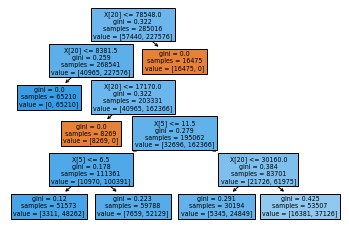

In [44]:
tree.plot_tree(tree_1, filled=True);

### Performance Metrics

In [45]:
tree_1_report = classification_report(y_test, y_pred)

print('Classification report of tree_1:\n', tree_1_report)

Classification report of tree_1:
               precision    recall  f1-score   support

           0       1.00      0.42      0.59     14311
           1       0.87      1.00      0.93     56943

    accuracy                           0.88     71254
   macro avg       0.94      0.71      0.76     71254
weighted avg       0.90      0.88      0.86     71254



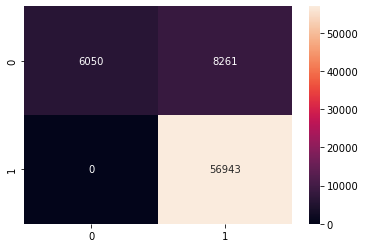

In [46]:
tree_1_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(tree_1_cm, annot=True, fmt='0.0f');

In [47]:
pred_df = pd.DataFrame({'Actual_Class':y_test, 'Predicted_Prob':y_pred})

In [48]:
pred_df['Predicted_Class'] = pred_df['Predicted_Prob'].map(lambda x: 1 if x>0.5 else 0)

In [49]:
fpr, tpr, threshold = roc_curve(pred_df['Actual_Class'], pred_df['Predicted_Prob'])

ROC AUC score: 0.7113758647194466


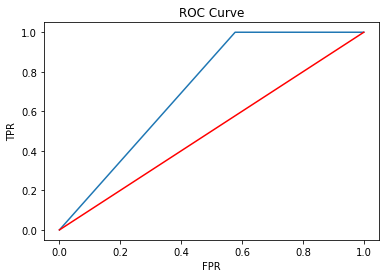

In [50]:
plt.plot(fpr, tpr);
plt.plot([0,1], [0,1], color='r');
plt.xlabel('FPR');
plt.ylabel('TPR');

plt.title('ROC Curve');

score = roc_auc_score(pred_df['Actual_Class'], pred_df['Predicted_Prob'])

print('ROC AUC score:', score)

### Modifying the model with increased max_depth: tree_2

In [51]:
tree_2 = DecisionTreeClassifier(max_depth=40)

tree_2 = tree_2.fit(X_train, y_train)

In [52]:
y_pred2 = tree_2.predict(X_test)

y_pred2[0:11]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [53]:
y_test[0:11]

372463    1
13687     0
117889    1
364824    1
228747    0
388978    1
153513    0
45477     0
247875    1
112175    1
316546    1
Name: loan_status, dtype: int64

In [54]:
tree_2_report = classification_report(y_test, y_pred2)

print('Classification report of tree_2:\n', tree_2_report)

Classification report of tree_2:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58     14311
           1       0.90      0.89      0.89     56943

    accuracy                           0.83     71254
   macro avg       0.73      0.74      0.74     71254
weighted avg       0.83      0.83      0.83     71254



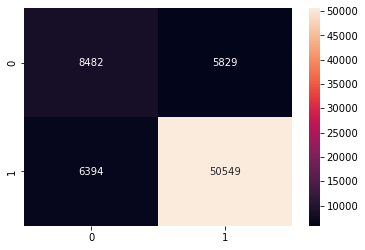

In [55]:
tree_2_cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(tree_2_cm, annot=True, fmt='0.0f');

In [56]:
pred_df2 = pd.DataFrame({'Actual_Class':y_test, 'Predicted_Prob':y_pred2})
pred_df2['Predicted_Class'] = pred_df2['Predicted_Prob'].map(lambda x: 1 if x>0.5 else 0)
fpr,tpr,threshold = roc_curve(pred_df2['Actual_Class'], pred_df2['Predicted_Prob'])

ROC AUC Score: 0.7402016053593112


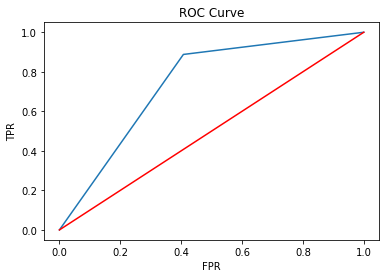

In [57]:
plt.plot(fpr, tpr);
plt.plot([0,1], [0,1], color='r');
plt.xlabel('FPR');
plt.ylabel('TPR');

plt.title('ROC Curve');

score=roc_auc_score(pred_df2['Actual_Class'], pred_df2['Predicted_Prob'])

print('ROC AUC Score:', score)